# Telecommunications Customer Segmentation Using K-Nearest Neighbors

This dataset reflects a telecommunications provider that has segmented its customer base by service usage patterns, categorizing the customers into four groups:

**1 - Basic Service, 2 - E-Service, 3 - Plus Service, and 4 - Total Service**

Using this data, we can build a model that predicts the class of a new customer using a K-Nearest Neighbor model.

We'll start by cleaning the data and doing some quick EDA. After that we'll separate our independent and dependent variables and normalize the data in preparation for modeling. Then we'll perform a train-test-split to train and test our model with a randomly chosen K value. We'll evaluate the model's accuracy then create a function to iterate through multiple K values and find the highest accuracy within the range defined in the function.

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

%matplotlib inline

# for deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Downloads/teleCust1000t.csv')

In [3]:
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


# Exploring the Data
Before we begin building our model we'll have to do some data exploration and cleaning to make sure our dataset is ready to be processed.

In [4]:
# checking for null values
df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [5]:
# determining how many classes are in our dataset
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

We can see from our value counts that we have 281 Plus Service, 266 Basic Service, 236 Total Service, and 217 E-Service customers.

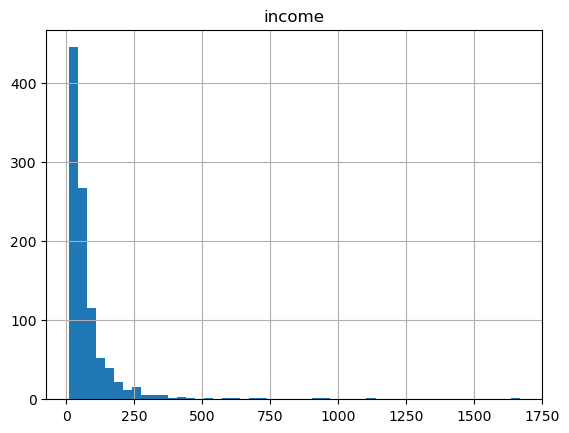

In [6]:
# visualizing the data
df.hist(column='income', bins=50)
plt.show()

## Defining Feature Sets
Now that we've cleaned the data and checked for null values, we can begin preparing the data for modeling. To do this we'll split our X and y data.

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
# converting the pd.df to a numpy array
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [9]:
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [10]:
# setting our labels
y = df['custcat'].values
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

# Normalizing the Data
Finally we want to standardize the data before modeling.

In [11]:
# normalizing the data before modeling
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

# Train, Test, Split
Now we'll split the data 80:20 so that 800 observations are used for training and 200 are used for testing.

In [12]:
# splitting the dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# k-NN Modeling
We'll train the model with k = 4 to begin.

## Training

In [13]:
# starting with k=4
k = 4

# training the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

In [14]:
neigh

KNeighborsClassifier(n_neighbors=4)

## Predicting

In [15]:
# predicting using our 'neigh' model with our unknown X_test data
yhat = neigh.predict(X_test)

In [16]:
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

## Evaluating Model Accuracy

In [17]:
# checking the accuracy metrics
print(f'Train set accuracy: {metrics.accuracy_score(y_train, neigh.predict(X_train))}')
print(f'Test set accuracy: {metrics.accuracy_score(y_test, yhat)}')

Train set accuracy: 0.5475
Test set accuracy: 0.32


# Creating a Function for K=n
Now we'll create a function that iterates through multiple values of K to find the best fit for our model.

In [18]:
# creating a iterative function for K
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # training the model in the function
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

## Plotting the Model Accuracy for Multiple Neighbors
To help us get a better idea of how our model performs, we'll plot the data which display a standard deviation of 1 and 3.

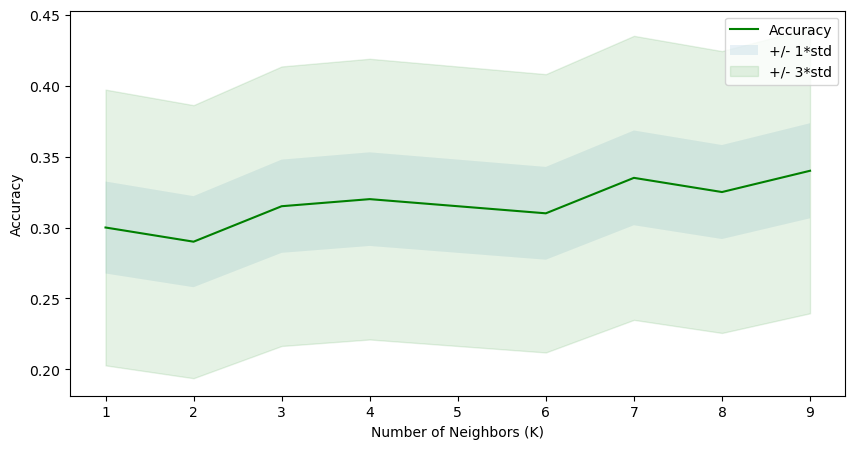

In [19]:
plt.figure(figsize=(10,5))
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy', '+/- 1*std', '+/- 3*std'))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print(f'As we can see from the plot above, the best accuracy was with {mean_acc.max()} with k = {mean_acc.argmax()+1}.')

As we can see from the plot above, the best accuracy was with 0.34 with k = 9.


(end)